# ANALYSING INTERNATIONAL BREWERIES LTD´S  SALE SALES DATABASE FOR 2020 & 2021

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [18]:
int_breweries = pd.read_csv(r"C:\Users\Nwachuks\Documents\Data Science\SQL\dataset\International_Breweries.csv")

In [19]:
int_breweries.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


# Profit Analysis

Question No. 1 : Within the space of the last three years, what was the profit worth of the breweries,inclusive of the anglophone and the francophone territories


In [20]:
total_profit = int_breweries["PROFIT"].sum()  #Total  profit 
total_profit

105587420

In [21]:
y_group = int_breweries.groupby("YEARS").sum()   # YEARly profit of the three years
yearly_profit = y_group[["PROFIT"]]
yearly_profit.rename(columns={'PROFIT':'Annual_Profit'},inplace=True)
yearly_profit

,Annual_Profit
YEARS,
2017,38503320
2018,37063850
2019,30020250


QUESTION NO 2 : Compare the total profit between these two territories in order for the territory manager,Mr. Stone made a strategic decision that will aid profit maximization in 2020.


In [22]:
# create a new column called "TERRITORIES" and split the countries as anglophone or francophone within the new column 
int_breweries["TERRITORIES"] = " "
for i in range(len(int_breweries)):    #instruct pandas to go through range and length of dataframe
    
    if int_breweries["COUNTRIES"][i] in ( 'Ghana', 'Nigeria'): # if index in countries is ghana or nigeria 
        int_breweries["TERRITORIES"][i] = "anglophone"         # Go to the new column Territories and call it anglophone
    else:
        int_breweries["TERRITORIES"][i] = "francophone"
int_breweries.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORIES
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,francophone


In [23]:
l_group = int_breweries.groupby("TERRITORIES").sum() # group the result by the sum of  the values in profit
lang_regional_profit = l_group[["PROFIT"]]
lang_regional_profit

,PROFIT
TERRITORIES,
anglophone,42389260
francophone,63198160


QUESTION NO 3 : Country that generated the highest profit in 2019

In [24]:
profit_2019 = int_breweries[int_breweries['YEARS'] == 2019]    # sorts year 2019
c_group = profit_2019.groupby("COUNTRIES").sum()
country_profit = c_group[["PROFIT"]]
country_profit = country_profit.sort_values(by='PROFIT', ascending=False)   # sort the profit in descending order
country_profit


#max_country_profit = country_profit.max() .... this will give max profit but since the group is small, we can view all
#max_country_profit

,PROFIT
COUNTRIES,
Ghana,7144070
Senegal,6687560
Togo,6109960
Benin,5273340
Nigeria,4805320


QUESTION NO. 4 : What is   the year with the highest profit

In [25]:
y_group = int_breweries.groupby("YEARS").sum()
year_profit = y_group[["PROFIT"]]
year_profit = year_profit.sort_values(by='PROFIT', ascending=False)   # sort the profit in descending order
year_profit.rename(columns={'PROFIT':'Annual_Profit'},inplace=True)
year_profit


#max_annual_profit = annual_profit.max() .... this will give max profit but since the group is small, we can view all


,Annual_Profit
YEARS,
2017,38503320
2018,37063850
2019,30020250


QUESTION NO 5 : Which month in the three years was the least profit generated?

In [26]:
m_group = int_breweries.groupby("MONTHS").sum()
month_profit = m_group[["PROFIT"]]
month_profit = month_profit.sort_values(by='PROFIT', ascending=True)   # sort the profit in ascending order
month_profit

#least_profit = month_profit.min() .... this will give least  profit but since the group is small, we can view all

,PROFIT
MONTHS,
April,8573830
September,8702660
January,8722990
August,8730940
October,8767100
May,8772250
July,8787010
December,8787290
November,8820330


QUESTION NO. 6 : What was the minimum profit in the month of December 2018?

In [27]:
d_2018 = int_breweries[(int_breweries['YEARS'] ==  2018) & (int_breweries['MONTHS'] == "December")] 
minimum_profit = d_2018["PROFIT"].min()
minimum_profit

38150

QUESTION NO. 7 :Compare the profit in percentage for each of the month in 2019


In [28]:

p_2019 = int_breweries[int_breweries['YEARS'] == 2019]
profit_percent = (p_2019.groupby("MONTHS").sum())/(p_2019["PROFIT"].sum())*100
m_group = profit_percent.groupby("MONTHS").sum()
month_profit = m_group[["PROFIT"]]
month_profit = month_profit.sort_values(by='PROFIT', ascending=False)   # sort the profit in ascending order
month_profit = round(month_profit,2)
month_profit.rename(columns={'PROFIT':'PROFIT%'},inplace=True)
month_profit
 

#m_group = p_2019.groupby("MONTHS").sum()
#m_profit = m_group[["PROFIT"]]
#m_profit = country_profit.sort_values(by='PROFIT', ascending=False)   # sort the profit in descending order
#country_profit

,PROFIT%
MONTHS,
January,10.87
August,9.94
July,9.81
April,9.50
November,8.91
June,8.89
May,8.57
March,8.43
October,7.40


QUESTION NO.8 : Which particular brand generated the highest profit in Senegal?

In [29]:
senegal = int_breweries[int_breweries['COUNTRIES'] == "Senegal"]    # sorts out Senegal
b_group = senegal.groupby("BRANDS").sum()
senegal_profit = b_group[["PROFIT"]]
senegal_profit = senegal_profit.sort_values(by='PROFIT', ascending=False)   # sort the profit in descending order
senegal_profit.rename(columns={'PROFIT':'Senegal_Profit'},inplace=True)
senegal_profit

,Senegal_Profit
BRANDS,
castle lite,7012980
budweiser,6480750
eagle lager,2061680
beta malt,1793750
grand malt,1525680
hero,1331600
trophy,1278750


# BRAND ANALYSIS

QUESTION NO. 1 : Within the last two years,what are the top three brands
consumed in the francophone countries


In [30]:
franc = int_breweries[(int_breweries['YEARS'] == 2018) | (int_breweries['YEARS'] == 2019) & (int_breweries['TERRITORIES'] == "francophone")] 
brand_group = franc.groupby("BRANDS").sum()
quantity_consumed = brand_group[["QUANTITY"]]
quantity_consumed = quantity_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
quantity_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
quantity_consumed.head(3)

,QUANTITY_SOLD
BRANDS,
trophy,72799
castle lite,69843
hero,66910


QUESTION NO.2 : Find out the top two choice of consumer brands in Ghana

In [31]:
country = int_breweries[int_breweries['COUNTRIES'] == 'Ghana']  
brand_group = country.groupby("BRANDS").sum()
ghana_consumed = brand_group[["QUANTITY"]]
ghana_consumed = ghana_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
ghana_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
ghana_consumed.head(1)

,QUANTITY_SOLD
BRANDS,
eagle lager,25829


QUESTION NO.3 :  Find out the details of drinks consumed in the past three years in the most oil rich
country in West Africa.

Oil rich country in Africa = Nigeria


In [32]:
malt["YEARS"].unique() # to check the years available

NameError: name 'malt' is not defined

In [33]:

country = int_breweries[int_breweries['COUNTRIES'] == 'Nigeria']  
brand_group = country.groupby("BRANDS").sum()
nigeria_consumed = brand_group[["QUANTITY"]]
nigeria_consumed = nigeria_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
nigeria_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
nigeria_consumed

,QUANTITY_SOLD
BRANDS,
budweiser,26153
eagle lager,25872
hero,25811
trophy,25743
castle lite,25681
beta malt,25381
grand malt,24666


QUESTION NO. 4 :Favorites malt brand in Anglophone region between 2018 and 2019

In [34]:
# create a new column called "DRINK_TYPE" and split the drinks into malt and beer for analysis

int_breweries["DRINK_TYPE"] = " "
for i in range(len(int_breweries)):    #instruct pandas to go through range and length of dataframe
    
    if int_breweries["BRANDS"][i] in ('beta malt','grand malt'): #if item index on list is in brand
        int_breweries["DRINK_TYPE"][i] = "Malt"         # Go to the new column DRINK_TYPE and labeL it Malt
    else:
        int_breweries["DRINK_TYPE"][i] = "Beer"
    






QUESTION NO.5 :Which brands sold the highest in 2019 in Nigeria?



In [35]:
country = int_breweries[(int_breweries['COUNTRIES'] == 'Nigeria') & (int_breweries['YEARS'] == 2019)]  
brand_group = country.groupby("BRANDS").sum()
naija_consumed = brand_group[["QUANTITY"]]
naija_consumed = naija_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
naija_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
naija_consumed

,QUANTITY_SOLD
BRANDS,
hero,9622
eagle lager,8401
beta malt,8389
grand malt,8125
trophy,5803
budweiser,5490
castle lite,3388


QUESTION NO. 6 :  Favorites brand in South_South region in Nigeria


In [36]:
int_breweries.rename(columns={'REGION ': 'REGION'},inplace=True)  # Naming REGION properly by removing the space
c = int_breweries[(int_breweries['COUNTRIES'] == 'Nigeria') & (int_breweries['REGION'] == 'southsouth')]  
brand_group = c.groupby("BRANDS").sum()
south_south = brand_group[["QUANTITY"]]
south_south = south_south.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
south_south.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
south_south

,QUANTITY_SOLD
BRANDS,
eagle lager,4551
trophy,4468
hero,4456
budweiser,4328
castle lite,4287
beta malt,4257
grand malt,3914


In [37]:
# int_breweries[int_breweries['COUNTRIES'] == 'Nigeria']
# int_breweries[int_breweries['REGION'] == 'southsouth']
int_breweries.columns

Index(['SALES_ID', 'SALES_REP', 'EMAILS', 'BRANDS', 'PLANT_COST', 'UNIT_PRICE',
       'QUANTITY', 'COST', 'PROFIT', 'COUNTRIES', 'REGION', 'MONTHS', 'YEARS',
       'TERRITORIES', 'DRINK_TYPE'],
      dtype='object')

In [38]:
int_breweries.head()
#c = int_breweries[(int_breweries['COUNTRIES'] == 'Nigeria') & (int_breweries['REGION'] == 'southsouth')]  


,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORIES,DRINK_TYPE
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,anglophone,Beer
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,anglophone,Beer
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,francophone,Beer
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,francophone,Beer
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,francophone,Beer


QUESTION NO. 7 : Bear consumption in Nigeria
    
    

In [39]:
beer = int_breweries[(int_breweries['COUNTRIES'] == "Nigeria") & (int_breweries['DRINK_TYPE'] == "Beer")] 
brand_group = beer.groupby("BRANDS").sum()
beer_consumed = brand_group[["QUANTITY"]]
beer_consumed = beer_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
beer_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
beer_consumed

,QUANTITY_SOLD
BRANDS,
budweiser,26153
eagle lager,25872
hero,25811
trophy,25743
castle lite,25681


QUESTION NO. 8 :Level of consumption of Budweiser in the regions in Nigeria

In [40]:
budweiser = int_breweries[(int_breweries['COUNTRIES'] == "Nigeria") & (int_breweries['BRANDS'] == "budweiser")] 
brand_group = budweiser.groupby("BRANDS").sum()
budweiser_consumed = brand_group[["QUANTITY"]]
budweiser_consumed = budweiser_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
budweiser_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
budweiser_consumed

,QUANTITY_SOLD
BRANDS,
budweiser,26153


QUESTION NO. 9 : Level of consumption of Budweiser in the regions in Nigeria in 2019

In [41]:
budweiser_2019 = int_breweries[(int_breweries['COUNTRIES'] == "Nigeria") & (int_breweries['BRANDS'] == "budweiser") & (int_breweries["YEARS"] == 2019)] 
brand_group = budweiser_2019.groupby("BRANDS").sum()
n_consumed = brand_group[["QUANTITY"]]
n_consumed = n_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
n_consumed.rename(columns={'QUANTITY':'QUANTITY_SOLD'},inplace=True)
n_consumed

,QUANTITY_SOLD
BRANDS,
budweiser,5490


# Countries Analysis

QUESTION NO. 1:Country with the highest consumption of beer.

In [42]:
 beer = int_breweries[int_breweries['DRINK_TYPE'] == "Beer"]
country_group = beer.groupby("COUNTRIES").sum()
total_consumed = country_group[["QUANTITY"]]
total_consumed = total_consumed.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
total_consumed.rename(columns={'QUANTITY':'CONSUMPTION'},inplace=True)
total_consumed

,CONSUMPTION
COUNTRIES,
Senegal,129875
Nigeria,129260
Benin,127455
Ghana,127232
Togo,125548


QUESTION NO.2 : Highest sales personnel of Budweiser in Senegal


In [43]:
 beer = int_breweries[(int_breweries['COUNTRIES'] == "Senegal") & (int_breweries['BRANDS'] == "budweiser")]
rep_group = beer.groupby("SALES_REP").sum()
sales = rep_group[["QUANTITY"]]
sales = sales.sort_values(by='QUANTITY', ascending=False)   # sort the profit in descending order
sales.rename(columns={'QUANTITY':'SALES'},inplace=True)
sales.head(3)

,SALES
SALES_REP,
Jones,5917
Sorvino,4246
Andrews,3336


QUESTION NO. 3:Country with the highest profit of the fourth quarter in 2019


In [44]:
#Creating a column called QUARTER to sub-divide months into quarter for easy anaysis

int_breweries["QUARTERS"] = " "
for i in range(len(int_breweries)):    #instruct pandas to go through range and length of dataframe
    
    if int_breweries["MONTHS"][i] in ('January','February','March'): 
        int_breweries["QUARTERS"][i] = "Qrt 1"    
    elif int_breweries["MONTHS"][i] in ('April','May','June'):    #if item index on list is in Month
        int_breweries["QUARTERS"][i] = "Qrt 2"                   # Go to the new column QUARTERS and labeL it Qrt 1
    elif int_breweries["MONTHS"][i] in ('July','August','September'): #if item index on list is in Month
        int_breweries["QUARTERS"][i] = "Qrt 3"  
    else:
        int_breweries["QUARTERS"][i] = "Qrt 4"
    

In [45]:
 qrts = int_breweries[int_breweries['QUARTERS'] == "Qrt 4"]
country_group = qrts.groupby("COUNTRIES").sum()
qrts_profit = country_group[["PROFIT"]]
qrts_profit = qrts_profit.sort_values(by='PROFIT', ascending=False)   # sort the profit in descending order
qrts_profit.rename(columns={'PROFIT':'QUARTER_PROFIT'},inplace=True)
qrts_profit

,QUARTER_PROFIT
COUNTRIES,
Nigeria,5519070
Togo,5490840
Benin,5283210
Senegal,5052430
Ghana,5029170


# VISUALIZATION OF RELATIONSHIP IN THE DATASET

1.Viz showing the performance of the  company across the months. To determine marketing strategies
2.viz showing performance of the territories in months
3. Viz showing country by country performance
4. Chart ranking total profits of  in years
5. sales and profit relationship of 
6.pie chart to determine which qrts performed best
7.heatmap representing  performance of the drinks

ValueError: s must be a scalar, or float array-like with the same size as x and y

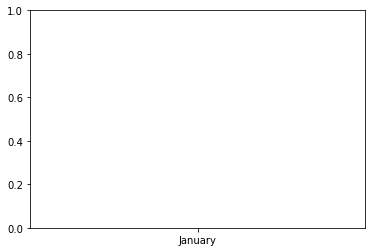

In [46]:

plt.scatter( int_breweries.MONTHS,int_breweries.PROFIT,'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

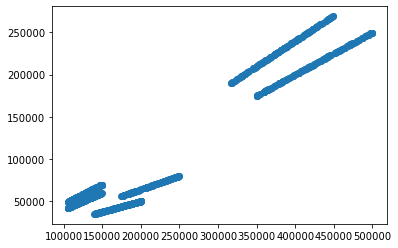

In [51]:
import matplotlib.pyplot as plt
from scipy import stats

x = int_breweries['COST']
y = int_breweries['PROFIT']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()